In [77]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy.stats import linregress

# Import API key for open weather.
from config import weather_api_key

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats,lngs)

In [14]:
coordinates = list(lat_lngs)

In [76]:
# Create a lsit for holding the cities.
cities = []

# Identify the nearest city for each coordinate.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is uniqe add it to the list of cities.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
print(len(cities))

620


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=182243d71ab8e753b83d3ea47d6bfb8d


In [36]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Initiate counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers in the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | fairlie
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | nkhotakota
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | loreto
Processing Record 22 of Set 1 | carnarvon
Pr

Processing Record 39 of Set 4 | fabiansebestyen
Processing Record 40 of Set 4 | nome
Processing Record 41 of Set 4 | tommot
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | paracatu
Processing Record 44 of Set 4 | chama
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | mana
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | saint-paul
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | russell
Processing Record 1 of Set 5 | sirnak
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | gravdal
Processing Record 4 of Set 5 | davila
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | santa maria
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | new norfolk
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | aswan
Processing Record 11 of Set 5 | sao filipe
Processing Record 12 of Set 5 | rio galleg

Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | adrar
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | dondo
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 40 of Set 8 | vigrestad
Processing Record 41 of Set 8 | mudgee
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | morehead
Processing Record 45 of Set 8 | kikwit
Processing Record 46 of Set 8 | oda
Processing Record 47 of Set 8 | monrovia
Processing Record 48 of Set 8 | tarakan
Processing Record 49 of Set 8 | san quintin
Processing Record 50 of Set 8 | beira
Processing Record 1 of Set 9 | colesberg
Processing Record 2

Processing Record 19 of Set 12 | mangrol
Processing Record 20 of Set 12 | shelburne
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | oktyabrskiy
Processing Record 23 of Set 12 | hauterive
Processing Record 24 of Set 12 | yatou
Processing Record 25 of Set 12 | somoto
Processing Record 26 of Set 12 | pisco
Processing Record 27 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 28 of Set 12 | daru
Processing Record 29 of Set 12 | shache
Processing Record 30 of Set 12 | maneadero
Processing Record 31 of Set 12 | khandbari
Processing Record 32 of Set 12 | vodyane
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | shush
Processing Record 35 of Set 12 | nilagiri
Processing Record 36 of Set 12 | cururupu
Processing Record 37 of Set 12 | the valley
Processing Record 38 of Set 12 | colgong
Processing Record 39 of Set 12 | beruwala
Processing Record 40 of Set 12 | coari
Processing Record 41 of Set 12 | margate
Processing Record

In [43]:
# Convert the city data into a DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,-0.40,70,75,18.34,CA,2020-12-24 02:54:43
1,Atuona,-9.80,-139.03,78.64,76,4,16.71,PF,2020-12-24 02:58:22
2,Punta Arenas,-53.15,-70.92,44.01,70,2,25.28,CL,2020-12-24 02:58:22


In [46]:
ordered_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[ordered_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2020-12-24 02:54:43,63.75,-68.51,-0.40,70,75,18.34
1,Atuona,PF,2020-12-24 02:58:22,-9.80,-139.03,78.64,76,4,16.71
2,Punta Arenas,CL,2020-12-24 02:58:22,-53.15,-70.92,44.01,70,2,25.28
3,Guerrero Negro,MX,2020-12-24 02:58:22,27.98,-114.06,62.08,65,100,5.95
4,Fairlie,GB,2020-12-24 02:58:22,55.76,-4.86,35.01,79,46,9.17


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot data on various scatter plots

In [49]:
# Extract data from DataFrame for scatter plots.
lats = city_data_df["Lat"]
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

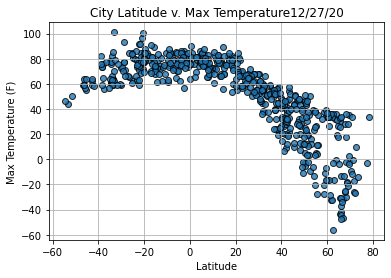

In [73]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

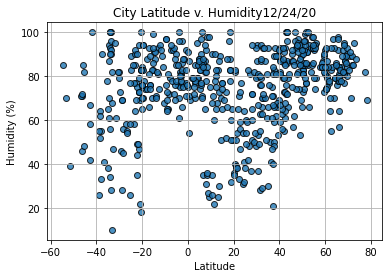

In [62]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

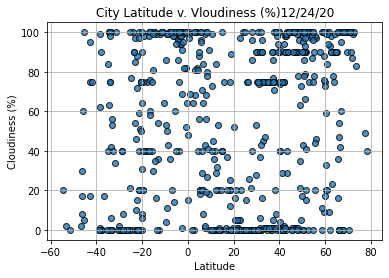

In [63]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Vloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

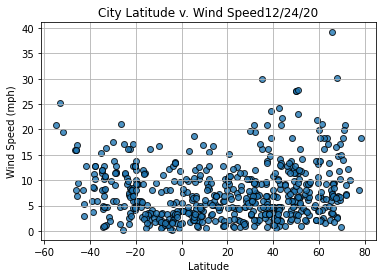

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## Test function for plots

In [71]:
def myScatter(yaxis, title, ylabel, fignum):
    # Build the scatter plot for latitude vs. max temperature.
    plt.scatter(lats,
                yaxis,
                edgecolor="black",
                linewidths=1,
                marker="o",
                alpha=0.8,
                label='Cities')

    # Incorporate the other graph properties.
    plt.title(title + time.strftime("%x"))
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure.
    plt.savefig("weather_data/fignum.png")

    # Show plot.
    plt.show()

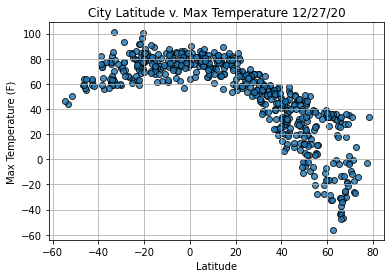

In [74]:
# Call the function.
myScatter(max_temp, "City Latitude v. Max Temperature ", "Max Temperature (F)", "Fig5")

## Use linear regressions to find relationships between variables.

In [117]:
# Create a funcion to perform linear regression on weather parameters
# and plot a regression line and the equation.
def plot_linreg(x_values, y_values, y_label, text_coordinates, title):
    
    # Run regression on hemisphere data.
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)
    
    # Calculate regression line "y values" from slope intercept forumula.
    regress_values = x_values * slope + intercept
    # Create equation of the reg line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text of the function.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"R value is {r_value:.2f}")

In [109]:
# Create DataFrames for northern and southern hemisphere.
northern_hemi = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi = city_data_df.loc[(city_data_df["Lat"] <= 0)]

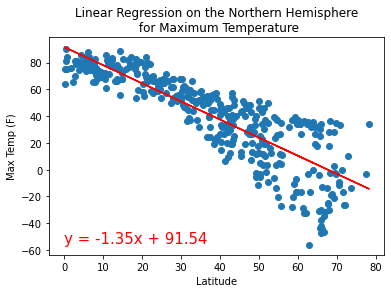

R value is -0.85


In [139]:
# Linear regression on the Northern Hemisphere and max temp.
plot_linreg(northern_hemi["Lat"], northern_hemi["Max Temp"], "Max Temp (F)", (0, -55), 
            "Linear Regression on the Northern Hemisphere\n for Maximum Temperature")


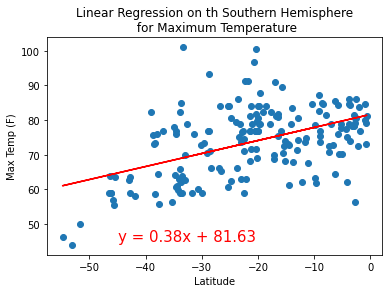

R value is 0.49


In [138]:
plot_linreg(southern_hemi["Lat"], southern_hemi["Max Temp"], "Max Temp (F)", (-45, 45),
           "Linear Regression on th Southern Hemisphere\n for Maximum Temperature")

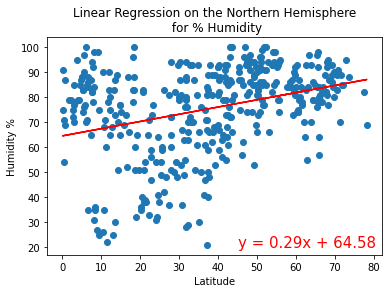

R value is 0.33


In [122]:
plot_linreg(northern_hemi["Lat"], northern_hemi["Humidity"], "Humidity %", (45, 20),
           "Linear Regression on the Northern Hemisphere\n for % Humidity")

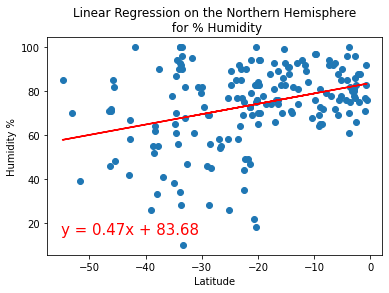

R value is 0.34


In [137]:
plot_linreg(southern_hemi["Lat"], southern_hemi["Humidity"], "Humidity %", (-55, 15),
           "Linear Regression on the Northern Hemisphere\n for % Humidity")

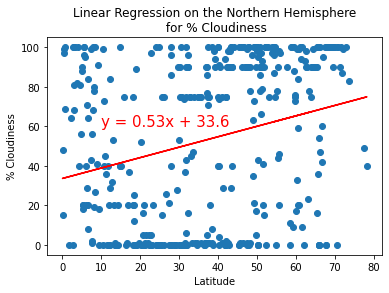

R value is 0.26


In [136]:
plot_linreg(northern_hemi["Lat"], northern_hemi["Cloudiness"], "% Cloudiness", (10,60),
           "Linear Regression on the Northern Hemisphere\n for % Cloudiness")

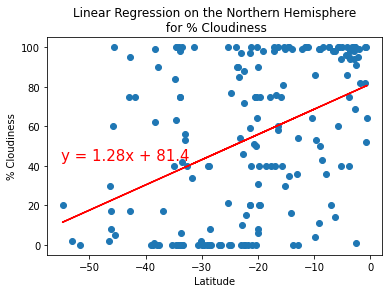

R value is 0.43


In [133]:
plot_linreg(southern_hemi["Lat"], southern_hemi["Cloudiness"], "% Cloudiness", (-55, 43),
           "Linear Regression on the Northern Hemisphere\n for % Cloudiness")

In [ ]:
plot_linreg(northern_hemi["Lat"], northern_hemi["Wind Speed"], "Wind Speed (mph)", (0,0),
           "Linear Regression on the")